In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score

In [2]:
dt = pd.read_csv('train.csv')
dt.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [4]:
dt.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [5]:
# checking if null values in both columns have same indices
print((dt.iloc[:,4].isnull() != dt.iloc[:,5].isnull()).sum())

0


In [6]:
# check the percentage of null values
(dt['lot_size'].isnull().sum()/len(dt['beds']))*100

17.21230158730159

In [7]:
dt['lot_size'].isnull().sum()

347

In [8]:
dt['price_per_sqft'] = (dt['price'] * 100000)/dt['size']

In [9]:
dt.describe()

,beds,baths,size,lot_size,zip_code,price,price_per_sqft
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05,5.915851e+07
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05,8.327952e+07
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05,6.796117e+06
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05,4.452221e+07
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05,5.529762e+07
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06,6.595389e+07
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07,3.424658e+09


In [10]:
klib.corr_mat(dt)

,beds,baths,size,lot_size,zip_code,price,price_per_sqft
beds,1.00,0.65,0.77,0.29,0.08,0.29,-0.09
baths,0.65,1.00,0.67,0.02,-0.00,0.32,-0.06
size,0.77,0.67,1.00,0.27,0.07,0.44,-0.08
lot_size,0.29,0.02,0.27,1.00,0.16,0.09,-0.02
zip_code,0.08,-0.00,0.07,0.16,1.00,-0.05,-0.05
price,0.29,0.32,0.44,0.09,-0.05,1.00,0.76
price_per_sqft,-0.09,-0.06,-0.08,-0.02,-0.05,0.76,1.00


In [11]:
dt.drop(columns= ['lot_size','lot_size_units','price_per_sqft'],inplace= True)
dt.isnull().sum()

beds          0
baths         0
size          0
size_units    0
zip_code      0
price         0
dtype: int64

In [12]:
dt.drop(['size_units'],axis=1,inplace=True)
dt.columns

Index(['beds', 'baths', 'size', 'zip_code', 'price'], dtype='object')

**FEATURE ENGINEERING**

In [13]:
x = dt.drop(columns=['price'])
y = dt['price']

In [14]:
x.head()

,beds,baths,size,zip_code
0,3,2.5,2590.0,98144
1,4,2.0,2240.0,98106
2,4,3.0,2040.0,98107
3,4,3.0,3800.0,98199
4,2,2.0,1042.0,98102


**FEATURE IMPORTANCE**

In [15]:
fs = ExtraTreesClassifier()

In [16]:
fs.fit(x,y)

ExtraTreesClassifier()

<Axes: >

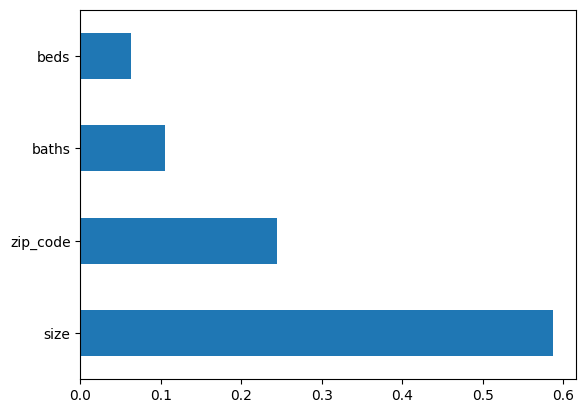

In [17]:
fi = pd.Series(fs.feature_importances_,index=x.columns)
fi.nlargest(10).plot(kind='barh')

In [18]:
# Since the values are large in 'size', it is affecting the feature importance, so lets scale 

sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.11345495,  0.33942758,  0.9286394 ,  0.89913582],
       [ 0.91040676, -0.15968693,  0.54816506, -0.77892394],
       [ 0.91040676,  0.83854209,  0.33075115, -0.73476447],
       ...,
       [ 0.91040676, -0.15968693,  0.4394581 ,  3.32790652],
       [-0.68349687, -0.15968693, -1.02265042, -0.91140234],
       [ 0.11345495, -0.15968693, -0.0279818 ,  0.41338168]])

**TESTING DATASET**

In [19]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [20]:
test.drop(columns=['lot_size','lot_size_units','size_units'],inplace=True)
test.columns

Index(['beds', 'baths', 'size', 'zip_code', 'price'], dtype='object')

In [21]:
x_test = test.drop(columns=['price'])
y_test = test['price']

In [22]:
x_test.head()

,beds,baths,size,zip_code
0,3,3.0,2850.0,98119
1,4,5.0,3040.0,98106
2,3,1.0,1290.0,98125
3,3,2.0,2360.0,98188
4,3,3.5,1942.0,98107


In [23]:
x_test = sc.fit_transform(x_test)
x_test

array([[ 0.03752404,  0.77064181,  1.08301944, -0.25618635],
       [ 0.86142136,  2.74614493,  1.28917319, -0.77931649],
       [ 0.03752404, -1.20486131, -0.60961136, -0.01474167],
       ...,
       [ 0.03752404,  0.27676603,  1.19152141, -0.29642713],
       [ 1.68531869,  2.74614493,  1.2566226 , -0.41714947],
       [ 0.03752404, -0.21710975, -0.59767614, -0.90003883]])

**LINEAR REGRESSION**

In [24]:
lr = LinearRegression()

lr.fit(x,y)

LinearRegression()

In [25]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([1549013.19148275, 1698290.52888548,  589312.71351254,
       1040366.13307076, 1135081.40474145,  595998.96354889,
        581555.89795939, 1640889.76027327,  894380.1061179 ,
        490669.26048434,  936790.51740579,  656637.32588131,
       1256865.18791265,  824684.58899292,  488577.39191166,
       1295657.83082727, 1205693.34266964,  825493.63946839,
        925124.15060665, 1261538.66437977,  633835.41662614,
       1283531.92435891,  970324.16746621,  500254.20373046,
        639257.75387353,  761281.28640872,  696856.95337336,
        726351.31302567,  920737.97643011,  460989.14586272,
        585535.41011607,  483143.73141457, 1751473.35714824,
        404013.67456592, 1096489.88533911, 1020724.26691427,
        471287.59844228, 1153787.76926603, 1159626.95119253,
       1478785.23239361, 1618543.20655502,  738750.73677324,
       1785901.56265825, 1112026.19962624, 1869881.58307181,
       1687312.12527784, 1102598.56815696,  967187.24283724,
       1254742.41697787,

In [26]:
l = Lasso()

l.fit(x,y)

Lasso()

In [27]:
y_pred_l = l.predict(x_test)
y_pred_l

array([1549007.77461358, 1698284.56018555,  589317.24647838,
       1040366.83374677, 1135078.39600818,  595998.92400769,
        581553.71923683, 1640884.29853692,  894384.56508665,
        490668.01972672,  936790.47979386,  656634.17493967,
       1256863.49381575,  824683.85999807,  488575.91622083,
       1295652.25656728, 1205692.28299115,  825491.87208226,
        925125.15682901, 1261535.56193224,  633842.21947015,
       1283528.94792801,  970322.39055705,  500252.87511302,
        639257.1157412 ,  761283.55335919,  696860.37807942,
        726352.2822266 ,  920741.50414677,  460991.09858316,
        585535.50705388,  483146.10181576, 1751468.35065498,
        404016.68305412, 1096485.88875534, 1020724.01716093,
        471289.90684089, 1153786.61895991, 1159625.15339095,
       1478781.39462937, 1618534.42839564,  738749.28687861,
       1785903.60567471, 1112027.30110486, 1869877.43760477,
       1687309.58832779, 1102604.15169802,  967187.51750489,
       1254742.33424919,

In [28]:
ri = Ridge()

ri.fit(x,y)

Ridge()

In [29]:
y_pred_ri = ri.predict(x_test)
y_pred_ri

array([1548275.12774926, 1698039.14502029,  589685.15433798,
       1040056.24481997, 1135114.44565063,  596242.24478402,
        581366.56728247, 1640672.07007143,  894725.97495456,
        490577.58116215,  936907.71711711,  656382.24162668,
       1256352.67866938,  824369.9162611 ,  488535.90534781,
       1294834.2788205 , 1205237.91550111,  825370.61747694,
        925125.235471  , 1261231.40182272,  634525.70266168,
       1283157.02844551,  969811.89802815,  500150.15919189,
        639482.99478187,  761516.83492102,  697113.54367992,
        726058.51052429,  921156.76723747,  461287.51375335,
        585784.60814256,  483319.4679381 , 1750926.35210327,
        404307.80236098, 1095969.62294429, 1020651.00954158,
        471510.53133158, 1153483.19735163, 1159403.88990818,
       1478006.88828405, 1617326.77850587,  738806.91818839,
       1786604.95352772, 1112301.99404347, 1868840.00257219,
       1686562.16471969, 1103028.65996548,  967176.7573982 ,
       1254810.9231154 ,

Text(0.5, 1.0, 'Actual price V/S Predicted price of Linear Regression')

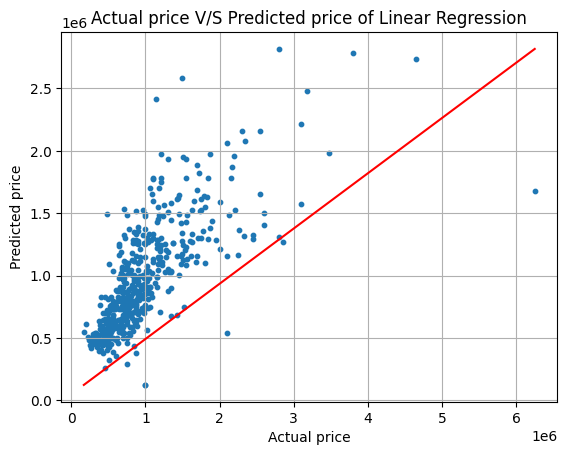

In [30]:
plt.scatter(y_test,y_pred_lr, s=10)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred_lr),max(y_pred_lr)],color="red")
plt.title("Actual price V/S Predicted price of Linear Regression")

Text(0.5, 1.0, 'Actual price V/S Predicted price of Lasso')

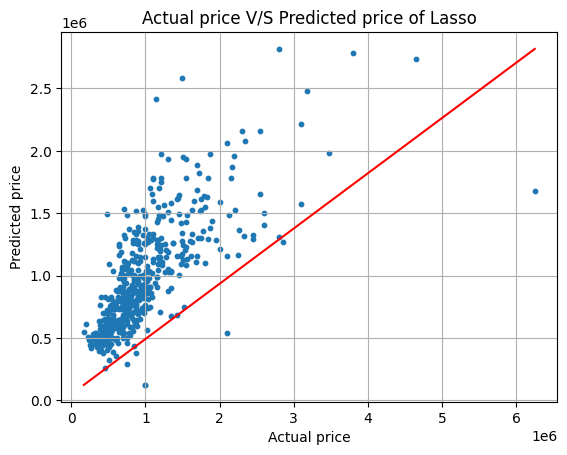

In [31]:
plt.scatter(y_test,y_pred_l, s=10)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred_l),max(y_pred_l)],color="red")
plt.title("Actual price V/S Predicted price of Lasso")

Text(0.5, 1.0, 'Actual price V/S Predicted price of Ridge')

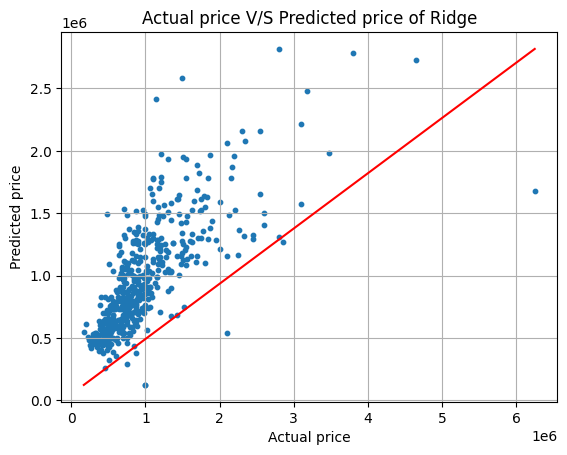

In [32]:
plt.scatter(y_test,y_pred_ri, s=10)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred_ri),max(y_pred_ri)],color="red")
plt.title("Actual price V/S Predicted price of Ridge")

In [33]:
print(r2_score(y_test,y_pred_lr))
print(r2_score(y_test,y_pred_l))
print(r2_score(y_test,y_pred_ri))

0.5309546606823233
0.5309547284327523
0.5309804145860908


**DEPLOYMENT**

In [34]:
import pickle

In [38]:
pickle.dump(ri,open("RidgeModel.pkl","wb"))